In [48]:
# Importing required modules and libraries

import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [49]:
# Loading known images and creating a database

# Person_1
image = cv2.imread(r"C:\Users\lsani\OneDrive\Desktop\facerecog\msd.jpg")
msd = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Person_2
image = cv2.imread(r"C:\Users\lsani\OneDrive\Desktop\facerecog\vk.jpg")
vk = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Person_3
image = cv2.imread(r"C:\Users\lsani\OneDrive\Desktop\facerecog\rohit.jpg")
rohit = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [50]:
# Encoding the face of each person

msd_encoding = face_recognition.face_encodings(msd)[0]
vk_encoding = face_recognition.face_encodings(vk)[0]
rohit_encoding = face_recognition.face_encodings(rohit)[0]

known_face_encodings = [
    msd_encoding,
    vk_encoding,
    rohit_encoding
]

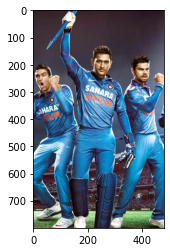

In [67]:
# Loading an unknown image (or testing image) and encoding it

image = cv2.imread(r"C:\Users\lsani\OneDrive\Desktop\facerecog\test7.jpg")
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [68]:
from scipy.spatial import distance

# There might be more than one face in the unknown image, so we have to loop it to check foe every face.

for unknown_face_encoding in unknown_face_encodings:
    results = []
    
    # Face in the unknown image has to tested with every image in the known database. So we need to loop it.
    
    for known_face_encoding in known_face_encodings:
        d = distance.euclidean(known_face_encoding,unknown_face_encoding)
        results.append(d)
    threshold = 0.6
    results = np.array(results) <= threshold
        
    name = "unknown"
        
    if results[0]:
        name = "Mahendra Singh Dhoni"
    elif results[1]:
        name = "Virat Kohli"
    elif results[2]:
        name = "Rohit Sharma"
            
    print("Found "+ name +" in the Image")

Found unknown in the Image
Found Virat Kohli in the Image
Found Mahendra Singh Dhoni in the Image
